### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15,10)
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

### Data preparation

In [2]:
# loading the dataset into a pandas dataframe
data = pd.read_csv("crx.data", names=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"])

In [3]:
data.sample()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
412,a,22.67,0.79,u,g,i,v,0.085,f,f,0,f,g,00144,0,-


In [4]:
# writing the dataframe to csv file
data.to_csv('powoade_project.csv', index = False)

### Exploratory Data Analysis

In [5]:
# checking the shape of the data (rows, column)
data.shape

(690, 16)

In [6]:
data['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [7]:
# checking for null values
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [8]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [9]:
# checking the data types of the columns to confirm my hypothesis above
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [10]:
# doing value counts on the column A2
data["A2"].value_counts()

?        12
22.67     9
20.42     7
23.58     6
25.00     6
         ..
46.08     1
60.58     1
25.83     1
60.92     1
36.50     1
Name: A2, Length: 350, dtype: int64

In [11]:
# checking occu
t = data.loc[:,[(data[col] == "?").any() for col in data.columns]]
t.columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [12]:
# counting the number of occurences of question marks (?) in each column of my dataframe
data[data == '?'].count()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

##### visualization

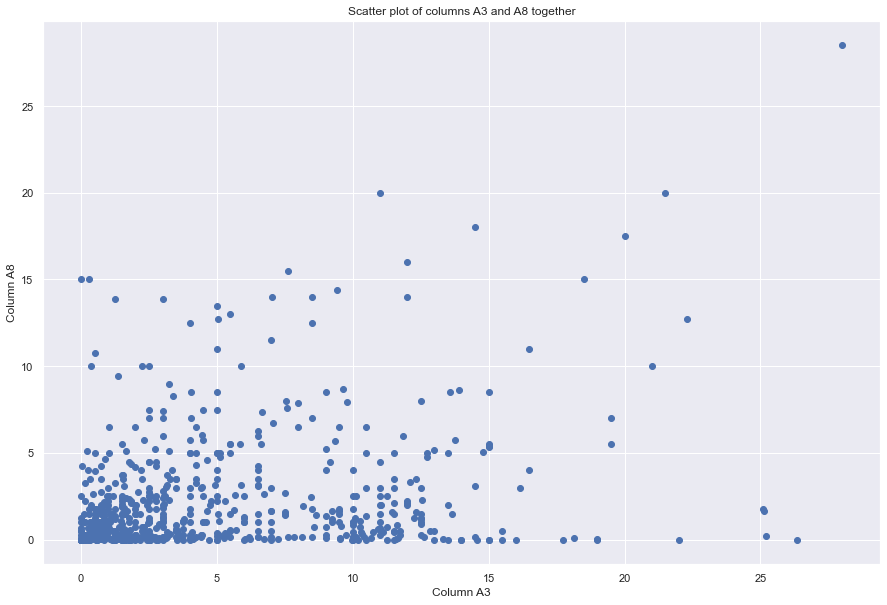

In [13]:
# scatter plot showing the relationship between column A3 and A8
plt.scatter(data["A3"],data["A8"])
plt.xlabel("Column A3")
plt.ylabel("Column A8")
plt.title("Scatter plot of columns A3 and A8 together")
plt.show()

##### Identifying Outliers

In [14]:
# coercing the invalid value, "?" that cannot be cast to numeric to NaN so I can check summary statistics
data[['A2', 'A14']] = data[['A2', 'A14']].apply(pd.to_numeric, errors='coerce')

In [15]:
# getting summary statistics for the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A2,678.0,31.568171,11.957862,13.75,22.6025,28.46,38.2300,80.25
A3,690.0,4.758725,4.978163,0.00,1.0000,2.75,7.2075,28.00
A8,690.0,2.223406,3.346513,0.00,0.1650,1.00,2.6250,28.50
A11,690.0,2.400000,4.862940,0.00,0.0000,0.00,3.0000,67.00
A14,677.0,184.014771,173.806768,0.00,75.0000,160.00,276.0000,2000.00
A15,690.0,1017.385507,5210.102598,0.00,0.0000,5.00,395.5000,100000.00


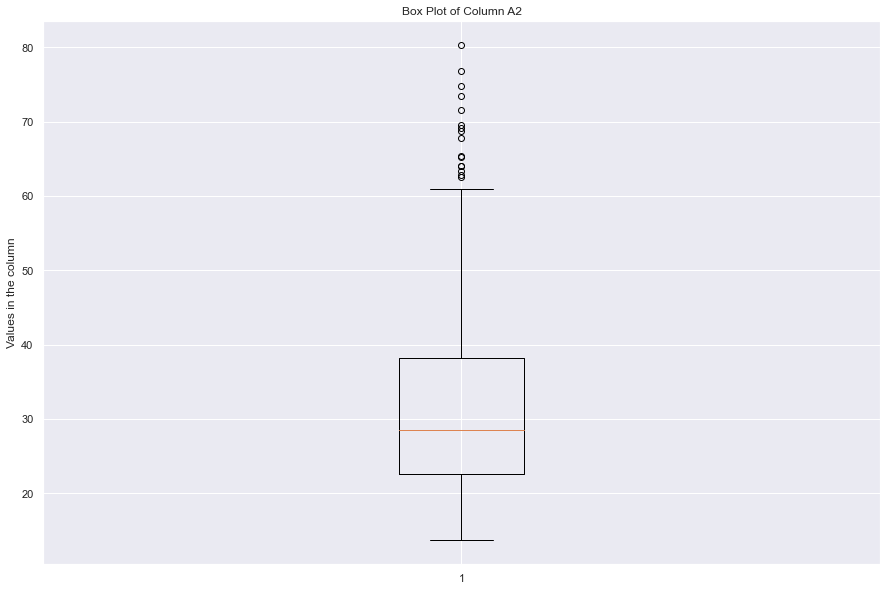

In [16]:
# getting only rows that have values in the A2 column
mask = data[pd.notna(data.A2)]

# plotting box plot
plt.boxplot(mask.A2)
plt.ylabel("Values in the column")
plt.title("Box Plot of Column A2")
plt.show()

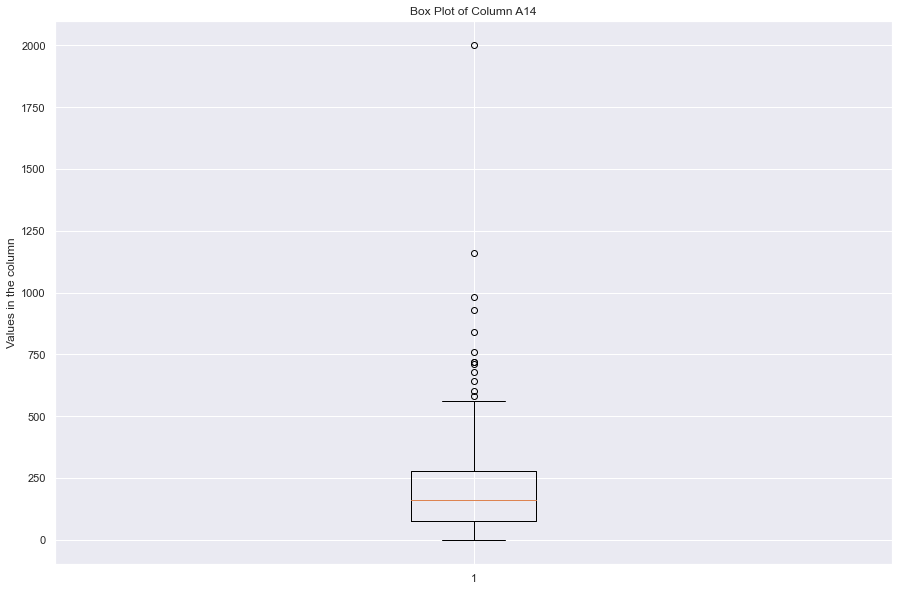

In [17]:
# getting only rows that have values in the A14 column
mask = data[pd.notna(data.A14)]

# plotting box plot
plt.boxplot(mask.A14)
plt.ylabel("Values in the column")
plt.title("Box Plot of Column A14")
plt.show()

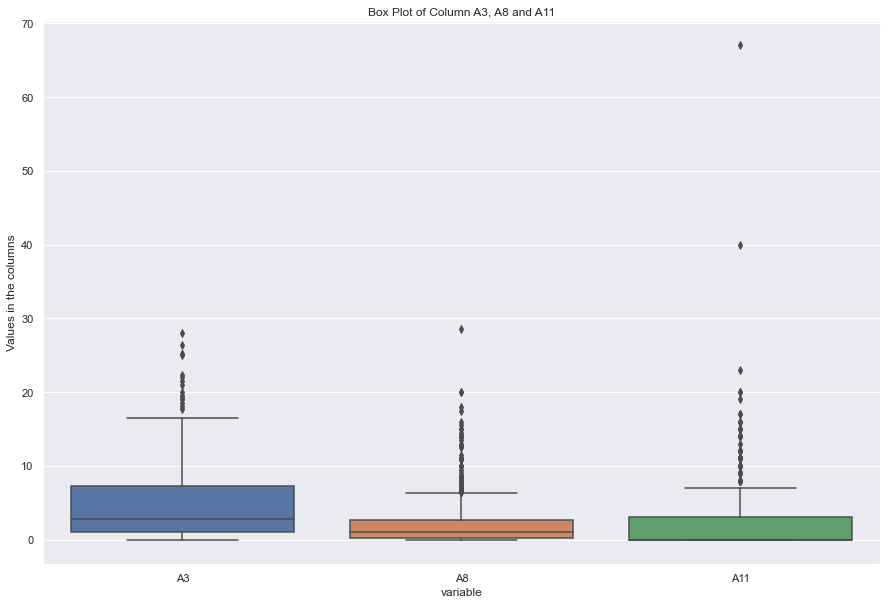

In [18]:
# plotting box plot for columns A3, A8 and A11 to check for outliers
df = pd.DataFrame(data=data, columns=["A3", "A8", "A11"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.ylabel("Values in the columns")
plt.title("Box Plot of Column A3, A8 and A11")
plt.show()

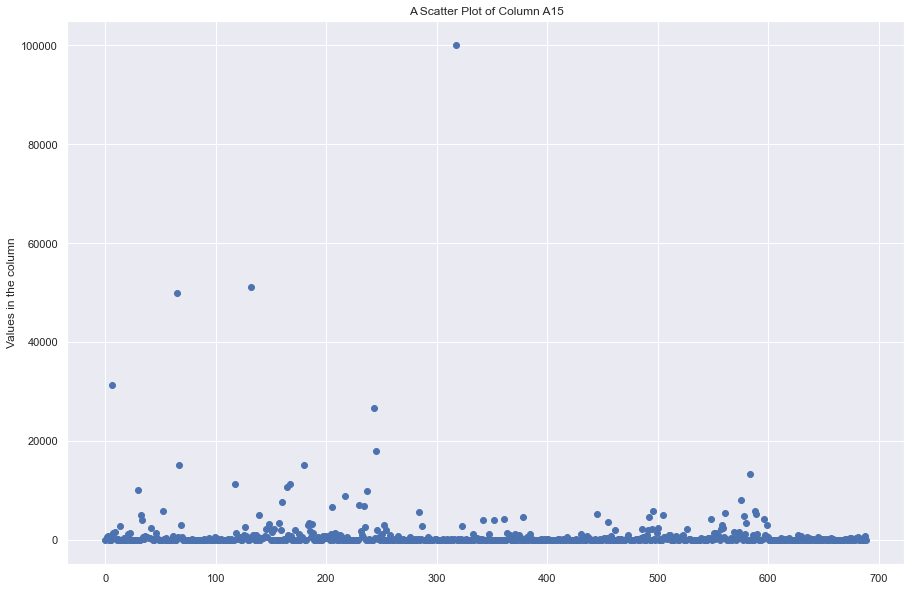

In [19]:
# plotting scatter plot for column A15 to see if there are outliers
plt.scatter(data.index, data["A15"])
plt.ylabel("Values in the column")
plt.title("A Scatter Plot of Column A15")
plt.show()

In [20]:
# getting only numerical variables into a list
numeric_clmns = data.dtypes[data.dtypes != "object"].index 
numeric_clmns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')

In [21]:
for i in numeric_clmns:
    # calculate summary statistics (25 and 75 quantile)
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    #Q1,Q3
    IQR = Q3 - Q1
    # calculating the upper and lower limits for the outliers
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR
    # print the column name
    print(f"For column {i}")
    outliers = [x for x in data[i] if x < lower_lim or x > upper_lim]
    print(f"Identified outliers: {len(outliers)}")
    # remove outliers
    outliers_removed = [x for x in data[i] if x >= lower_lim and x <= upper_lim]
    print(f"Non-outlier observations: {len(outliers_removed)}")
    #printing the indexes of the rows that are outliers
    affected_rows = np.where((data[i] >= upper_lim) | (data[i] <= lower_lim))
    print(f"The affected rows are: {affected_rows}\n")

For column A2
Identified outliers: 16
Non-outlier observations: 662
The affected rows are: (array([ 90, 130, 157, 206, 221, 296, 345, 348, 405, 485, 502, 539, 550,
       573, 585, 586], dtype=int64),)

For column A3
Identified outliers: 17
Non-outlier observations: 673
The affected rows are: (array([ 27,  44,  69,  80, 183, 234, 241, 250, 305, 317, 455, 485, 505,
       529, 550, 585, 586], dtype=int64),)

For column A8
Identified outliers: 63
Non-outlier observations: 627
The affected rows are: (array([  6,  22,  27,  28,  31,  32,  39,  43,  44,  54,  71,  72,  73,
        92,  93, 108, 116, 118, 123, 124, 125, 130, 132, 147, 164, 168,
       171, 172, 173, 180, 185, 194, 197, 205, 209, 210, 212, 216, 218,
       221, 231, 234, 242, 246, 250, 300, 321, 365, 370, 450, 477, 492,
       505, 515, 528, 534, 549, 550, 556, 564, 586, 587, 689], dtype=int64),)

For column A11
Identified outliers: 79
Non-outlier observations: 611
The affected rows are: (array([ 15,  17,  20,  26,  27,  31, 

### Preprocessing, Feature Selection and Engineering

##### Addressing the columns with missing values

In [22]:
# defining a function to fill the ? with the mode for categorical features
def fill_with_mode(feature):
    """
    takes a column in the dataset as an argument and replaces all occurences of question marks "?" 
    with the mode of the column
    """
    return feature.replace('?', feature.mode()[0], inplace = True)

##### column A1

In [23]:
# starting with column A1 which has 12 missing values
data["A1"].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [24]:
# replacing the missing data in the A1 column with the mode
# calling my function
fill_with_mode(data["A1"])

##### columns A2 and A14

In [25]:
# replacing the NaN values in the A2 column with the mean
data['A2'] = data['A2'].fillna(data['A2'].median())

# replacing the NaN values in the A14 column with the mean
data['A14'] = data['A14'].fillna(data['A14'].median())

##### column A4

In [26]:
# for column A4 which has 6 missing values
data["A4"].value_counts()

u    519
y    163
?      6
l      2
Name: A4, dtype: int64

In [27]:
# converting the ? to t
data["A4"].replace('?', "t", inplace=True)

##### column A5

In [28]:
# for column A5 which has 6 missing values
data["A5"].value_counts()

g     519
p     163
?       6
gg      2
Name: A5, dtype: int64

In [29]:
# replacing the missing data in the A5 column with the mode
# calling my function 
fill_with_mode(data["A5"])

##### column A6

In [30]:
# for column A6 which has 9 missing values
data["A6"].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64

In [31]:
# replacing the missing data in the A6 column with the mode
# calling my function 
fill_with_mode(data["A6"])

##### column A7

In [32]:
# for column A7 which has 9 missing values
data["A7"].value_counts()

v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [33]:
# replacing the missing data in the A7 column with the mode
# calling my function 
fill_with_mode(data["A7"])

In [34]:
# confirming that there are no more occurences of question marks (?) my dataframe
data[data == '?'].count()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

##### handling outliers

In [35]:
#create log-transformed data
data[numeric_clmns] = np.log1p(data[numeric_clmns])
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,3.460409,0.000000,u,g,w,v,0.810930,t,t,0.693147,f,g,5.313206,0.000000,+
1,a,4.088829,1.697449,u,g,q,h,1.396245,t,t,1.945910,f,g,3.784190,6.329721,+
2,a,3.238678,0.405465,u,g,q,h,0.916291,t,f,0.000000,f,g,5.638355,6.715383,+
3,b,3.361417,0.932164,u,g,w,v,1.558145,t,t,1.791759,t,g,4.615121,1.386294,+
4,b,3.052585,1.890850,u,g,w,v,0.996949,t,f,0.000000,f,s,4.795791,0.000000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,3.094672,2.405593,y,p,e,h,0.810930,f,f,0.000000,f,g,5.564520,0.000000,-
686,a,3.164208,0.559616,u,g,c,v,1.098612,f,t,1.098612,t,g,5.303305,5.978886,-
687,a,3.267666,2.674149,y,p,ff,ff,1.098612,f,t,0.693147,t,g,5.303305,0.693147,-
688,b,2.940220,0.186480,u,g,aa,v,0.039221,f,f,0.000000,f,g,5.638355,6.621406,-


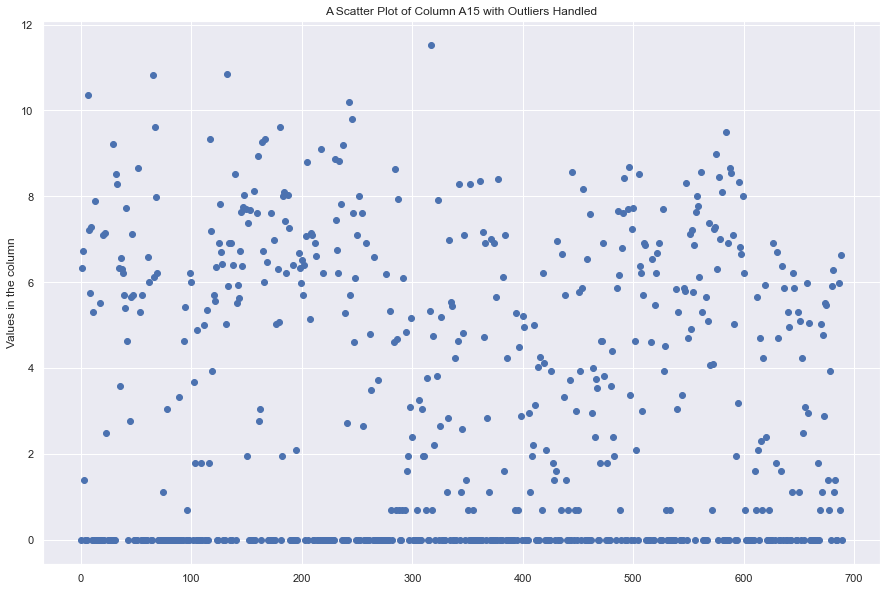

In [36]:
# plotting scatter plot of column A15 with outliers handled using logarithmic transformation
plt.scatter(data.index, data["A15"])
plt.ylabel("Values in the column")
plt.title("A Scatter Plot of Column A15 with Outliers Handled")
plt.show()

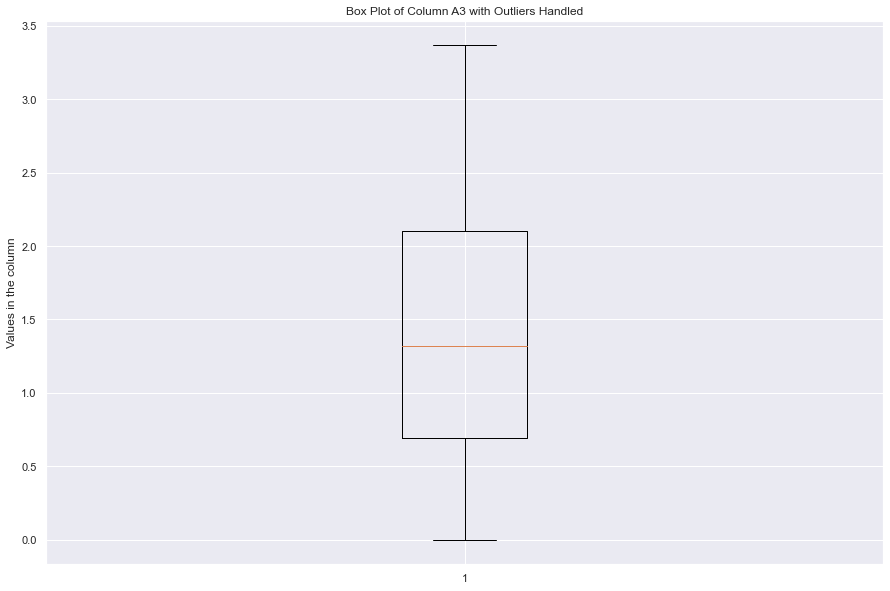

In [37]:
# plotting box plot of column A3 with outliers handled using logarithmic transformation
plt.boxplot(data["A3"])
plt.ylabel("Values in the column")
plt.title("Box Plot of Column A3 with Outliers Handled")
plt.show()

##### performing appropriate encoding

In [38]:
#Let's do OneHot encoding with Pandas
encoded = pd.get_dummies(data=data[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']],prefix=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'],drop_first=True)
encoded

,A1_b,A4_t,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
686,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
687,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
688,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
# changing the class labels to 1s and 0s
data["A16"].replace({"+": 1, "-": 0}, inplace=True)

In [40]:
#Let's concatenate the encoded dataframe with the original dataframe-right
data_hotted = pd.concat([encoded, data.drop(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'],axis=1)], axis=1)

In [41]:
data_hotted

,A1_b,A4_t,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,...,A12_t,A13_p,A13_s,A2,A3,A8,A11,A14,A15,A16
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,3.460409,0.000000,0.810930,0.693147,5.313206,0.000000,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,4.088829,1.697449,1.396245,1.945910,3.784190,6.329721,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,3.238678,0.405465,0.916291,0.000000,5.638355,6.715383,1
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,3.361417,0.932164,1.558145,1.791759,4.615121,1.386294,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,3.052585,1.890850,0.996949,0.000000,4.795791,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,1,0,1,0,0,0,1,...,0,0,0,3.094672,2.405593,0.810930,0.000000,5.564520,0.000000,0
686,0,0,1,0,0,0,1,0,0,0,...,1,0,0,3.164208,0.559616,1.098612,1.098612,5.303305,5.978886,0
687,0,0,0,1,0,1,0,0,0,0,...,1,0,0,3.267666,2.674149,1.098612,0.693147,5.303305,0.693147,0
688,1,0,1,0,0,0,0,0,0,0,...,0,0,0,2.940220,0.186480,0.039221,0.000000,5.638355,6.621406,0


### Model Creation and Evaluation

In [42]:
# separating the dependent and independent variables
predictors = data_hotted.loc[:, data_hotted.columns != 'A16']
target = data_hotted['A16']
predictors

,A1_b,A4_t,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,...,A10_t,A12_t,A13_p,A13_s,A2,A3,A8,A11,A14,A15
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,3.460409,0.000000,0.810930,0.693147,5.313206,0.000000
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,4.088829,1.697449,1.396245,1.945910,3.784190,6.329721
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,3.238678,0.405465,0.916291,0.000000,5.638355,6.715383
3,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,3.361417,0.932164,1.558145,1.791759,4.615121,1.386294
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,3.052585,1.890850,0.996949,0.000000,4.795791,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,3.094672,2.405593,0.810930,0.000000,5.564520,0.000000
686,0,0,1,0,0,0,1,0,0,0,...,1,1,0,0,3.164208,0.559616,1.098612,1.098612,5.303305,5.978886
687,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,3.267666,2.674149,1.098612,0.693147,5.303305,0.693147
688,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2.940220,0.186480,0.039221,0.000000,5.638355,6.621406


In [43]:
# initializing the MLP algorithm
nn_clf = MLPClassifier(random_state=3)

# training the model
nn_clf.fit(predictors, target)

# using cross-validate to evaluate performance
scores_baseline = cross_validate(nn_clf, predictors, target, cv=10, scoring=["recall","f1"])

# getting the scores for each of the metrics by finding the mean of the scores
recall_score_baseline = np.mean(scores_baseline["test_recall"])
f1_score_baseline = np.mean(scores_baseline["test_f1"])

# getting the list of scores for each fold
recall_baseline = scores_baseline["test_recall"]
f1_baseline = scores_baseline["test_f1"]

# printing the 10 scores
print(f"The 10 scores from the CVs for recall are: {recall_baseline}\n")
print(f"The 10 scores from the CVs for F1 are:{f1_baseline}\n")

# printing the scores
print(f"The recall score with the base MLP model and cv=10 is: {recall_score_baseline}")
print(f"The F1 score with the base MLP model and cv=10 is: {f1_score_baseline}")

The 10 scores from the CVs for recall are: [0.87096774 0.80645161 1.         0.90322581 0.87096774 0.77419355
 0.70967742 0.86666667 1.         0.66666667]

The 10 scores from the CVs for F1 are:[0.6        0.76923077 0.96875    0.93333333 0.93103448 0.85714286
 0.81481481 0.68421053 0.96774194 0.78431373]

The recall score with the base MLP model and cv=10 is: 0.8468817204301076
The F1 score with the base MLP model and cv=10 is: 0.8310572444570251


##### performing hyperparameter tuning

In [44]:
#defining the search space for the algorithms
hyperparams={'Multi-layer Perceptron Classifier':
                 {'model': MLPClassifier(),
                  'params':{
                    'hidden_layer_sizes': [50, 100, 150],
                    'activation' : ["identity", "logistic", "tanh", "relu"],
                    'solver': ["lbfgs", "sgd", "adam"]
                    }
                }
            }

In [45]:
accuracy_values=[]

for key in hyperparams.keys():
    g_search=GridSearchCV(hyperparams[key]['model'],hyperparams[key]['params'],
                          cv=10,return_train_score=True,verbose=1)
    g_search.fit(predictors, target)

    accuracy_values.append({'model':key,
                            'best_score':g_search.best_score_,
                            'best_params':g_search.best_params_
                           })


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [47]:
accuracy_values

[{'model': 'Multi-layer Perceptron Classifier',
  'best_score': 0.8579710144927537,
  'best_params': {'activation': 'identity',
   'hidden_layer_sizes': 150,
   'solver': 'sgd'}}]

In [48]:
#putting the results from the list into a dataframe
accuracy_table=pd.DataFrame(accuracy_values,columns=['model','best_params','best_score'])

accuracy_table

,model,best_params,best_score
0,Multi-layer Perceptron Classifier,"{'activation': 'identity', 'hidden_layer_sizes...",0.857971


##### using best hyperparameters

In [53]:
# initializing the MLP algorithm
nn_clf_tuned = MLPClassifier(random_state=3, solver="sgd", activation="identity", hidden_layer_sizes=150)

# training the model
nn_clf_tuned.fit(predictors, target)

# using cross-validate to evaluate performance
scores_tuned = cross_validate(nn_clf_tuned, predictors, target, cv=10, scoring=["recall","f1"])

# getting the scores for each of the metrics by finding the mean of the scores
recall_score_tuned = np.mean(scores_tuned["test_recall"])
f1_score_tuned = np.mean(scores_tuned["test_f1"])

# getting the list of scores for each fold
recall_tuned = scores_tuned["test_recall"]
f1_tuned = scores_tuned["test_f1"]

# printing the 10 scores
print(f"The 10 scores from the CVs for recall are: {recall_tuned}\n")
print(f"The 10 scores from the CVs for F1 are:{f1_tuned}\n")

# printing the scores
print(f"The recall score with the Tuned MLP model and cv=10 is: {recall_score_tuned}")
print(f"The F1 score with the base Tuned model and cv=10 is: {f1_score_tuned}")

The 10 scores from the CVs for recall are: [0.93548387 0.87096774 0.96774194 0.87096774 0.96774194 0.70967742
 0.67741935 0.96666667 0.96666667 0.63333333]

The 10 scores from the CVs for F1 are:[0.66666667 0.81818182 0.98360656 0.9        0.98360656 0.81481481
 0.77777778 0.78378378 0.98305085 0.76      ]

The recall score with the Tuned MLP model and cv=10 is: 0.8566666666666667
The F1 score with the base Tuned model and cv=10 is: 0.8471488823436587


##### visualizations to show the comparison

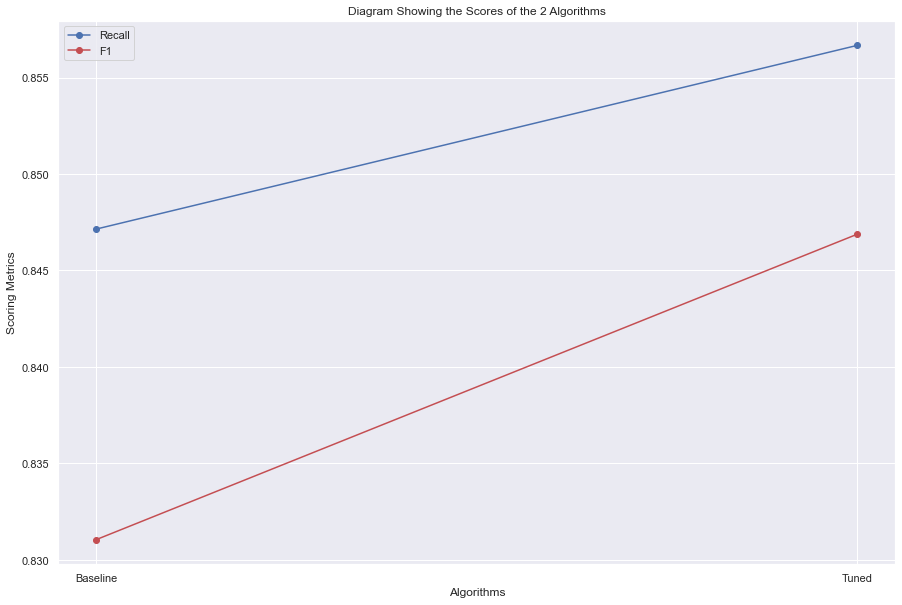

In [55]:
# the models
models = ["Baseline", "Tuned"]

# creating a list of the scores from the metrics
list_tuned = [f1_score_tuned, recall_score_tuned]
list_untuned = [f1_score_baseline, recall_score_baseline]

#merging the 3 lists together
df1 = pd.DataFrame(list(zip(models, list_tuned, list_untuned)), columns =['Models', "Recall", "F1"])

#plotting the graph
plt.plot(df1["Models"], df1["Recall"], "bo-", label="Recall")
plt.plot(df1["Models"], df1["F1"], "ro-", label="F1")
plt.title("Diagram Showing the Scores of the 2 Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Scoring Metrics")
plt.legend()
plt.show()

In [51]:
df1

,Models,Recall,F1
0,Baseline,0.847149,0.831057
1,Tuned,0.856667,0.846882


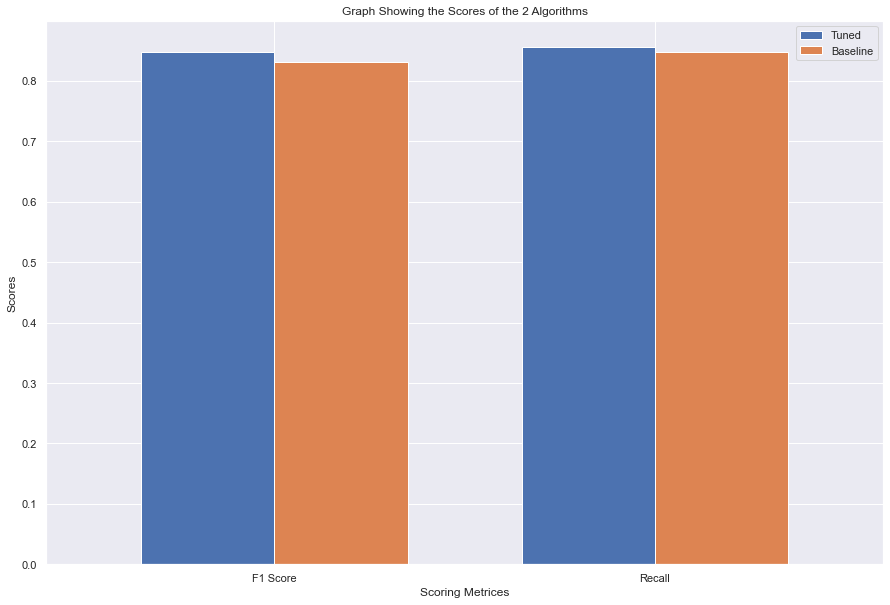

In [56]:
# the metrics
metrics = ['F1 Score', 'Recall']

# creating a list of the scores from the metrics
list_tuned = [f1_score_tuned, recall_score_tuned]
list_untuned = [f1_score_baseline, recall_score_baseline]

# merging the 3 lists together
df = pd.DataFrame(list(zip(metrics, list_tuned, list_untuned)), columns =['Metrics', "Tuned", "Baseline"])

# plotting the graph
df.plot(x="Metrics", kind ="bar", width=0.7)
#plt.xlabel("criteria")
plt.xticks(rotation=0)
plt.ylabel("Scores")
plt.xlabel("Scoring Metrices")
plt.title("Graph Showing the Scores of the 2 Algorithms")
plt.show()